# Read Data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd  '/content/gdrive/MyDrive/HCML/Explainability'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/HCML/Explainability


# Data Exploration: missing values

In [4]:
import numpy as np
diabetes_dataset_raw = pd.read_csv('diabetes_130_raw.csv')
diabetes_dataset_raw.replace('?', np.nan, inplace=True)
diabetes_dataset_raw.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jul 15 18:11:12 2018

@author: Yang
"""
 # import pandas
import pandas as pd

# Function to calculate missing values by column
def missing_values_table(df):

    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    # .iloc[:, 1]!= 0: filter on missing missing values not equal to zero
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)  # round(2), keep 2 digits

    # Print some summary information
    print("Your slelected dataframe has {} columns.".format(df.shape[1]) + '\n' +
    "There are {} columns that have missing values.".format(mis_val_table_ren_columns.shape[0]))

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [6]:
missing_values_table(diabetes_dataset_raw)

Your slelected dataframe has 50 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
weight,98569,96.86
max_glu_serum,96420,94.75
A1Cresult,84748,83.28
medical_specialty,49949,49.08
payer_code,40256,39.56
race,2273,2.23
diag_3,1423,1.40
diag_2,358,0.35
diag_1,21,0.02


In [8]:
# Get columns with NaN values
columns_with_nan = diabetes_dataset_raw.columns[diabetes_dataset_raw.isna().any()].tolist()

print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['race', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult']


In [10]:
diabetes_dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Data Preparation

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GroupShuffleSplit

diabetes_dataset = pd.read_csv('diabetes_130_raw.csv')
diabetes_dataset.drop(axis=1, columns=['weight', 'medical_specialty', 'payer_code'], inplace=True)
diabetes_dataset = diabetes_dataset.sort_values(by=['patient_nbr', 'encounter_id'])
# Define the ranges and replacement values
ICD9_mapping = [
    ((1, 139), 'Infectious And Parasitic Diseases'),
    ((140, 239), 'Neoplasms'),
    ((240, 279), 'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders'),
    ((280, 289), 'Diseases Of The Blood And Blood-Forming Organs'),
    ((290, 319), 'Mental Disorders'),
    ((320, 389), 'Diseases Of The Nervous System And Sense Organs'),
    ((390, 459), 'Diseases Of The Circulatory System'),
    ((460, 519), 'Diseases Of The Respiratory System'),
    ((520, 579), 'Diseases Of The Digestive System'),
    ((580, 629), 'Diseases Of The Genitourinary System'),
    ((630, 679), 'Complications Of Pregnancy, Childbirth, And The Puerperium'),
    ((680, 709), 'Diseases Of The Skin And Subcutaneous Tissue'),
    ((710, 739), 'Diseases Of The Musculoskeletal System And Connective Tissue'),
    ((740, 759), 'Congenital Anomalies'),
    ((760, 779), 'Certain Conditions Originating In The Perinatal Period'),
    ((780, 799), 'Symptoms, Signs, And Ill-Defined Conditions'),
    ((800, 999), 'Injury And Poisoning'),
    ('V', 'Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services'),
    ('E', 'Supplementary Classification Of External Causes Of Injury And Poisoning')
]

# Custom function to replace values based on multiple ranges
def replace_multiple_ranges(x, ranges_and_values):
    for values, new_value in ranges_and_values:
        if type(values) == tuple and x[0] != 'V' and x[0] != 'E' and x != '?':
            if values[0] <= int(float(x)) <= values[1]:
                return new_value
        elif type(values) == str and x[0] == values:
            return new_value
    return x

# Apply the custom function to the diagnosis columns
diabetes_dataset['diag_1'] = diabetes_dataset['diag_1'].apply(replace_multiple_ranges, args=(ICD9_mapping,))
diabetes_dataset['diag_2'] = diabetes_dataset['diag_2'].apply(replace_multiple_ranges, args=(ICD9_mapping,))
diabetes_dataset['diag_3'] = diabetes_dataset['diag_3'].apply(replace_multiple_ranges, args=(ICD9_mapping,))

# Replace '?' with 'no record' across diag_2 and diag_3
diabetes_dataset[['diag_2', 'diag_3']] = diabetes_dataset[['diag_2', 'diag_3']].replace('?', 'no record')

# Replace '?' with NaN
diabetes_dataset[['race', 'diag_1']] = diabetes_dataset[['race', 'diag_1']].replace('?', np.nan)

# Drop rows with missing values in columns 'race' and 'diag_1'
diabetes_dataset.dropna(subset=['race', 'diag_1'], inplace=True)

admission_type_id_mapping = {1:'Emergency',
                             2:'Urgent',
                             3:'Elective',
                             4:'Newborn',
                             5:'Not Available',
                             6:'NULL',
                             7:'Trauma Center',
                             8:'Not Mapped'
                            }
discharge_disposition_id_mapping = {1: 'ischarged to home',
                                    2:'ischarged/transferred to another short term hospital',
                                    3:'ischarged/transferred to SNF',
                                    4:'ischarged/transferred to ICF',
                                    5:'ischarged/transferred to another type of inpatient care institution',
                                    6:'ischarged/transferred to home with home health service',
                                    7:'eft AMA',
                                    8:'ischarged/transferred to home under care of Home IV provider',
                                    9:'dmitted as an inpatient to this hospital',
                                    10:'Neonate discharged to another hospital for neonatal aftercare',
                                    11:'Expired',
                                    12:'Still patient or expected to return for outpatient services',
                                    13:'Hospice / home',
                                    14:'Hospice / medical facility',
                                    15:'Discharged/transferred within this institution to Medicare approved swing bed',
                                    16:'Discharged/transferred/referred another institution for outpatient services',
                                    17:'Discharged/transferred/referred to this institution for outpatient services',
                                    18:'NULL',
                                    19:'Expired at home. Medicaid only, hospice.',
                                    20:'Expired in a medical facility. Medicaid only, hospice.',
                                    21:'Expired, place unknown. Medicaid only, hospice.',
                                    22:'Discharged/transferred to another rehab fac including rehab units of a hospital.',
                                    23:'Discharged/transferred to a long term care hospital.',
                                    24:'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
                                    25:'Not Mapped',
                                    26:'Unknown/Invalid',
                                    30:'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
                                    27:'Discharged/transferred to a federal health care facility.',
                                    28:'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
                                    29:'Discharged/transferred to a Critical Access Hospital (CAH).'
                                    }
admission_source_id_mapping = {1: 'Physician Referral',
                               2: 'Clinic Referral',
                               3: 'HMO Referral',
                               4: 'Transfer from a hospital',
                               5: 'Transfer from a Skilled Nursing Facility (SNF)',
                               6: 'Transfer from another health care facility',
                               7: 'Emergency Room',
                               8: 'Court/Law Enforcement',
                               9: 'Not Available',
                               10:' Transfer from critial access hospital',
                               11:' Normal Delivery',
                               12:' Premature Delivery',
                               13:' Sick Baby',
                               14:' Extramural Birth',
                               15:' Not Available',
                               17:' NULL',
                               18:' Transfer From Another Home Health Agency',
                               19:' Readmission to Same Home Health Agency',
                               20:' Not Mapped',
                               21:' Unknown/Invalid',
                               22:' Transfer from hospital inpt/same fac reslt in a sep claim',
                               23:' Born inside this hospital',
                               24:' Born outside this hospital',
                               25:' Transfer from Ambulatory Surgery Center',
                               26:' Transfer from Hospice'
                               }

diabetes_dataset['admission_type_id'] = diabetes_dataset['admission_type_id'].replace(admission_type_id_mapping)
diabetes_dataset['discharge_disposition_id'] = diabetes_dataset['discharge_disposition_id'].replace(discharge_disposition_id_mapping)
diabetes_dataset['admission_source_id'] = diabetes_dataset['admission_source_id'].replace(admission_source_id_mapping)


# select all categorical columns
categorical_columns = [col for col in diabetes_dataset.columns if not pd.api.types.is_numeric_dtype(diabetes_dataset[col])]

# Apply One-Hot Encoding for nominal categorical columns
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(diabetes_dataset[categorical_columns])

# Ensure correct shape when creating DataFrame for one-hot encoded data
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_columns), index=diabetes_dataset.index)

# Combine one-hot encoded columns with the rest of the DataFrame
df_encoded = pd.concat([diabetes_dataset.drop(columns=categorical_columns), one_hot_encoded_df], axis=1)

# Define the unique identifier column
unique_id_column = 'patient_nbr'

In [12]:
# Function to combine one-hot encoded target columns back to a single column
def combine_one_hot_encoded_target(df, target_prefix):
    # Find all columns that start with the target_prefix
    target_columns = [col for col in df.columns if col.startswith(target_prefix)]

    # Combine the columns into a single column
    def get_target_value(row):
        for col in target_columns:
            if row[col] == 1:
                return col.replace(target_prefix, '')
        return np.nan

    df[target_prefix[:-1]] = df.apply(get_target_value, axis=1)

    # Drop the one-hot encoded columns
    df.drop(columns=target_columns, inplace=True)

    return df

# Apply this function to your DataFrame
df_encoded = combine_one_hot_encoded_target(df_encoded, 'readmitted_')

# Ensure the target column is categorical
df_encoded['readmitted'] = pd.Categorical(df_encoded['readmitted'])

In [13]:
df_encoded['readmitted'].head(10)

4267     <30
4780     >30
5827      NO
67608     NO
17494     NO
2270      NO
1164     >30
5953     >30
14180    >30
23623    >30
Name: readmitted, dtype: category
Categories (3, object): ['<30', '>30', 'NO']

In [14]:
missing_values_table(df_encoded)

Your slelected dataframe has 218 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [15]:
# Get columns with NaN values
columns_with_nan = diabetes_dataset.columns[diabetes_dataset.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['max_glu_serum', 'A1Cresult']


## Divide into chunks

In [5]:
# Function to divide the dataset into chunks to limit RAM usage
def divide_in_chunks(diabetes_dataset, chunk_dir='data_chunks', rows_per_chunk=10000):
    os.makedirs(chunk_dir, exist_ok=True)
    for i, chunk in enumerate(range(0, len(diabetes_dataset), rows_per_chunk)):
        chunk_df = diabetes_dataset.iloc[chunk:chunk + rows_per_chunk]
        chunk_df.to_csv(os.path.join(chunk_dir, f'chunk_{i}.csv'), index=False)

## Cross-validation

In [6]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, HillClimbSearch, BicScore
from pgmpy.inference import VariableElimination
from sklearn.model_selection import GroupShuffleSplit, KFold
from sklearn.metrics import accuracy_score

# Define a function to perform cross-validation using GroupShuffleSplit
def cross_validate_bayesian_network(data, target, unique_id_column, k=10):
    kf = GroupShuffleSplit(n_splits=k, test_size=0.4, random_state=42)
    accuracies = []

    for train_index, test_index in kf.split(data, groups=data[unique_id_column]):
        train_df = data.iloc[train_index]
        test_df = data.iloc[test_index]

        # Structure learning using Hill Climb Search
        hc = HillClimbSearch(train_df)
        best_model = hc.estimate(scoring_method=BicScore(train_df))
        print(f"Learned structure for fold:", best_model.edges())

        # Create a Bayesian network with the learned structure
        model = BayesianNetwork(best_model.edges())

        # Learn the parameters of the Bayesian network
        model.fit(train_df, estimator=MaximumLikelihoodEstimator)

        # Perform inference on the Bayesian network
        infer = VariableElimination(model)

        # Perform prediction for the target variable
        test_evidence = test_df.drop(columns=[target]).to_dict(orient='records')
        true_labels = test_df[target].values
        predicted_labels = []

        for evidence in test_evidence:
            result = infer.map_query(variables=[target], evidence=evidence)
            predicted_labels.append(result[target])

        # Calculate accuracy for this fold
        accuracy = accuracy_score(true_labels, predicted_labels)
        print(f"Accuracy for this fold: {accuracy}")
        accuracies.append(accuracy)

    # Aggregate results from folds (e.g., average accuracy)
    average_accuracy = sum(accuracies) / len(accuracies)
    print(f"Average accuracy across folds: {average_accuracy}")
    return model, average_accuracy



# Perform cross-validation
bn_model, average_accuracy = cross_validate_bayesian_network(df_encoded, target='readmitted', unique_id_column=unique_id_column, k=10)

ModuleNotFoundError: No module named 'pgmpy'

# Training

## BN: Cross-validation with chunking

In [ ]:
!pip install pgmpy
!pip install joblib
!pip install pydot graphviz

### HillClimb, 10 folds

In [ ]:
import os
import pickle
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, HillClimbSearch, BicScore
from pgmpy.inference import VariableElimination
from sklearn.model_selection import GroupShuffleSplit, KFold
from sklearn.metrics import accuracy_score

# Function to perform cross-validation using KFold with data chunks
def cross_validate_bayesian_network(chunk_dir, target, unique_id_column, k=10):
    chunk_files = [os.path.join(chunk_dir, f) for f in os.listdir(chunk_dir) if f.endswith('.csv')]
    accuracies = []

    # Create a single DataFrame to get unique groups for KFold
    df = pd.concat([pd.read_csv(f) for f in chunk_files])
    groups = df[unique_id_column].unique()

    # Using KFold to create train/test indices
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for i, (train_groups, test_groups) in enumerate(kf.split(groups)):
        train_groups_set = set(train_groups)
        test_groups_set = set(test_groups)

        # Initialize empty DataFrames for train and test
        train_df = pd.DataFrame()
        test_df = pd.DataFrame()

        # Load chunks and split into train and test based on groups
        for chunk_file in chunk_files:
            chunk_df = pd.read_csv(chunk_file)
            train_df = pd.concat([train_df, chunk_df[chunk_df[unique_id_column].isin(train_groups_set)]])
            test_df = pd.concat([test_df, chunk_df[chunk_df[unique_id_column].isin(test_groups_set)]])

        # Free up memory by deleting the combined DataFrame
        del chunk_df

        # Structure learning using Hill Climb Search
        hc = HillClimbSearch(train_df)
        best_model = hc.estimate(scoring_method=BicScore(train_df))
        print(f"Learned structure for fold {i+1}:", best_model.edges())

        # Create a Bayesian network with the learned structure
        model = BayesianNetwork(best_model.edges())

        # Learn the parameters of the Bayesian network
        model.fit(train_df, estimator=MaximumLikelihoodEstimator)

        # Perform inference on the Bayesian network
        infer = VariableElimination(model)

        # Perform prediction for the target variable
        test_evidence = test_df.drop(columns=[target]).to_dict(orient='records')
        true_labels = test_df[target].values
        predicted_labels = []

        for evidence in test_evidence:
            result = infer.map_query(variables=[target], evidence=evidence)
            predicted_labels.append(result[target])

        # Calculate accuracy for this fold
        accuracy = accuracy_score(true_labels, predicted_labels)
        print(f"Accuracy for fold {i+1}: {accuracy}")
        accuracies.append(accuracy)

    # Aggregate results from folds (e.g., average accuracy)
    average_accuracy = sum(accuracies) / len(accuracies)
    print(f"Average accuracy across folds: {average_accuracy}")
    return model, average_accuracy



# Divide dataset into chunks
divide_in_chunks(df_encoded, rows_per_chunk=10000)

# Perform cross-validation
bn_model, average_accuracy = cross_validate_bayesian_network('data_chunks', target='readmitted', unique_id_column=unique_id_column, k=10)


### TreeSearch, 10 folds

In [22]:
print(list(df_encoded.columns))

['encounter_id', 'patient_nbr', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Female', 'gender_Male', 'gender_Unknown/Invalid', 'age_[0-10)', 'age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)', 'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)', 'age_[90-100)', 'admission_type_id_Elective', 'admission_type_id_Emergency', 'admission_type_id_NULL', 'admission_type_id_Newborn', 'admission_type_id_Not Available', 'admission_type_id_Not Mapped', 'admission_type_id_Trauma Center', 'admission_type_id_Urgent', 'discharge_disposition_id_Discharged/transferred to a federal health care facility.', 'discharge_disposition_id_Discharged/transferred to a long term care hospital.', 'discharge_disposition_id_Discharged/transferred to a nursing facility certified under Medicaid but 

In [23]:
# Get columns with NaN values
columns_with_nan = df_encoded.columns[df_encoded.isna().any()].tolist()

print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


In [25]:
import os
import pickle
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, TreeSearch, BicScore
from pgmpy.inference import VariableElimination
from sklearn.model_selection import GroupShuffleSplit, KFold
from sklearn.metrics import accuracy_score

# Function to save the model to disk
def save_model(model, filename):
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

# Function to perform cross-validation using KFold with data chunks
def cross_validate_bayesian_network(chunk_dir, target, unique_id_column, k=10):
    chunk_files = [os.path.join(chunk_dir, f) for f in os.listdir(chunk_dir) if f.endswith('.csv')]
    accuracies = []

    # Create a single DataFrame to get unique groups for KFold
    df = pd.concat([pd.read_csv(f) for f in chunk_files])
    groups = df[unique_id_column].unique()

    # Using KFold to create train/test indices
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for i, (train_groups, test_groups) in enumerate(kf.split(groups)):
        train_groups_set = set(train_groups)
        test_groups_set = set(test_groups)

        # Initialize empty DataFrames for train and test
        train_df = pd.DataFrame()
        test_df = pd.DataFrame()

        # Load chunks and split into train and test based on groups
        for chunk_file in chunk_files:
            chunk_df = pd.read_csv(chunk_file)
            train_df = pd.concat([train_df, chunk_df[chunk_df[unique_id_column].isin(train_groups_set)]])
            test_df = pd.concat([test_df, chunk_df[chunk_df[unique_id_column].isin(test_groups_set)]])

        # Free up memory by deleting the combined DataFrame
        del chunk_df

        ts = TreeSearch(train_df)
        best_model = ts.estimate(estimator_type="tan", class_node=target)
        print(f"Learned structure for fold {i+1}:", best_model.edges())

        # Create a Bayesian network with the learned structure
        model = BayesianNetwork(best_model.edges())

        # Learn the parameters of the Bayesian network
        model.fit(train_df, estimator=MaximumLikelihoodEstimator)

        # Save the model to disk
        save_model(model, f'model_fold_{i+1}.pkl')

        # Perform inference on the Bayesian network
        infer = VariableElimination(model)

        # Perform prediction for the target variable
        test_evidence = test_df.drop(columns=[target]).to_dict(orient='records')
        true_labels = test_df[target].values
        predicted_labels = []

        for evidence in test_evidence:
            result = infer.map_query(variables=[target], evidence=evidence)
            predicted_labels.append(result[target])

        # Calculate accuracy for this fold
        accuracy = accuracy_score(true_labels, predicted_labels)
        print(f"Accuracy for fold {i+1}: {accuracy}")
        accuracies.append(accuracy)

    # Aggregate results from folds (e.g., average accuracy)
    average_accuracy = sum(accuracies) / len(accuracies)
    print(f"Average accuracy across folds: {average_accuracy}")
    return model, average_accuracy



# Divide dataset into chunks
divide_in_chunks(df_encoded, rows_per_chunk=10000)

# Perform cross-validation
bn_model, average_accuracy = cross_validate_bayesian_network('data_chunks', target='readmitted', unique_id_column=unique_id_column, k=5)


Building tree:   0%|          | 0/23653.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/23653.0 [00:00<?, ?it/s]

Learned structure for fold 1: [('encounter_id', 'patient_nbr'), ('encounter_id', 'num_lab_procedures'), ('encounter_id', 'num_medications'), ('encounter_id', 'time_in_hospital'), ('encounter_id', 'number_diagnoses'), ('encounter_id', 'num_procedures'), ('encounter_id', 'number_inpatient'), ('encounter_id', 'insulin_No'), ('encounter_id', 'admission_source_id_Emergency Room'), ('encounter_id', 'admission_type_id_Emergency'), ('encounter_id', 'insulin_Steady'), ('encounter_id', 'diag_3_Diseases Of The Circulatory System'), ('encounter_id', 'discharge_disposition_id_ischarged to home'), ('encounter_id', 'diabetesMed_No'), ('encounter_id', 'diabetesMed_Yes'), ('encounter_id', 'diag_1_Diseases Of The Circulatory System'), ('encounter_id', 'race_Caucasian'), ('encounter_id', 'diag_2_Diseases Of The Circulatory System'), ('encounter_id', 'race_AfricanAmerican'), ('encounter_id', 'diag_3_Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders'), ('encounter_id', 'admission_source

IndexError: index 29758806 is out of bounds for axis 1 with size 234

### TreeSearch, 5 folds

#### skip

In [ ]:
import os
import pickle
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, TreeSearch
from pgmpy.inference import VariableElimination
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Function to save the model to disk
def save_model(model, filename):
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

# Function to divide the dataset into chunks
def divide_in_chunks(df, chunk_dir, rows_per_chunk=10000):
    if not os.path.exists(chunk_dir):
        os.makedirs(chunk_dir)

    num_chunks = len(df) // rows_per_chunk + 1
    for i in range(num_chunks):
        start = i * rows_per_chunk
        end = (i + 1) * rows_per_chunk
        chunk = df.iloc[start:end]
        chunk.to_csv(os.path.join(chunk_dir, f'chunk_{i+1}.csv'), index=False)

# Function to perform cross-validation using KFold with data chunks
def cross_validate_bayesian_network(chunk_dir, target, unique_id_column, k=10):
    chunk_files = [os.path.join(chunk_dir, f) for f in os.listdir(chunk_dir) if f.endswith('.csv')]
    accuracies = []

    # Create a single DataFrame to get unique groups for KFold
    df = pd.concat([pd.read_csv(f) for f in chunk_files])
    groups = df[unique_id_column].unique()

    # Using KFold to create train/test indices
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for i, (train_index, test_index) in enumerate(kf.split(groups)):
        train_groups_set = set(groups[train_index])
        test_groups_set = set(groups[test_index])

        # Initialize empty DataFrames for train and test
        train_df = pd.DataFrame()
        test_df = pd.DataFrame()

        # Load chunks and split into train and test based on groups
        for chunk_file in chunk_files:
            chunk_df = pd.read_csv(chunk_file)
            train_df = pd.concat([train_df, chunk_df[chunk_df[unique_id_column].isin(train_groups_set)]])
            test_df = pd.concat([test_df, chunk_df[chunk_df[unique_id_column].isin(test_groups_set)]])

        # Free up memory by deleting the combined DataFrame
        del chunk_df

        ts = TreeSearch(train_df)
        best_model = ts.estimate(estimator_type="tan", class_node=target)
        print(f"Learned structure for fold {i+1}:", best_model.edges())

        # Create a Bayesian network with the learned structure
        model = BayesianNetwork(best_model.edges())

        # Learn the parameters of the Bayesian network
        model.fit(train_df, estimator=MaximumLikelihoodEstimator)

        # Save the model to disk
        save_model(model, f'model_fold_{i+1}.pkl')

        # Perform inference on the Bayesian network
        infer = VariableElimination(model)

        # Perform prediction for the target variable
        test_evidence = test_df.drop(columns=[target]).to_dict(orient='records')
        true_labels = test_df[target].values
        predicted_labels = []

        for evidence in test_evidence:
            result = infer.map_query(variables=[target], evidence=evidence)
            predicted_labels.append(result[target])

        # Calculate accuracy for this fold
        accuracy = accuracy_score(true_labels, predicted_labels)
        print(f"Accuracy for fold {i+1}: {accuracy}")
        accuracies.append(accuracy)

    # Aggregate results from folds (e.g., average accuracy)
    average_accuracy = sum(accuracies) / len(accuracies)
    print(f"Average accuracy across folds: {average_accuracy}")
    return model, average_accuracy

# Assuming df_encoded is your DataFrame and unique_id_column is defined
# Define your parameters
rows_per_chunk = 10000
chunk_dir = 'data_chunks'
target = 'readmitted'
unique_id_column = 'patient_nbr'

# Divide dataset into chunks
divide_in_chunks(df_encoded, chunk_dir, rows_per_chunk=rows_per_chunk)

# Perform cross-validation
bn_model, average_accuracy = cross_validate_bayesian_network(chunk_dir, target, unique_id_column, k=5)


#### RAM optimized version

In [18]:
import os
import pickle
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, TreeSearch
from pgmpy.inference import VariableElimination
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import gc

# Function to save the model to disk
def save_model(model, filename):
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

# Function to divide the dataset into chunks
def divide_in_chunks(df, chunk_dir, rows_per_chunk=10000):
    if not os.path.exists(chunk_dir):
        os.makedirs(chunk_dir)

    num_chunks = len(df) // rows_per_chunk + 1
    for i in range(num_chunks):
        start = i * rows_per_chunk
        end = (i + 1) * rows_per_chunk
        chunk = df.iloc[start:end]
        chunk.to_csv(os.path.join(chunk_dir, f'chunk_{i+1}.csv'), index=False)

# Function to perform cross-validation using KFold with data chunks
def cross_validate_bayesian_network(chunk_dir, target, unique_id_column, k=10):
    chunk_files = [os.path.join(chunk_dir, f) for f in os.listdir(chunk_dir) if f.endswith('.csv')]
    accuracies = []

    # Read the first chunk to get unique groups for KFold
    df_sample = pd.read_csv(chunk_files[0])
    groups = df_sample[unique_id_column].unique()
    del df_sample
    gc.collect()

    # Using KFold to create train/test indices
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for i, (train_index, test_index) in enumerate(kf.split(groups)):
        train_groups_set = set(groups[train_index])
        test_groups_set = set(groups[test_index])

        # Initialize empty DataFrames for train and test
        train_df = pd.DataFrame()
        test_df = pd.DataFrame()

        # Load chunks and split into train and test based on groups
        for chunk_file in chunk_files:
            chunk_df = pd.read_csv(chunk_file)
            train_df = pd.concat([train_df, chunk_df[chunk_df[unique_id_column].isin(train_groups_set)]])
            test_df = pd.concat([test_df, chunk_df[chunk_df[unique_id_column].isin(test_groups_set)]])
            del chunk_df
            gc.collect()

        ts = TreeSearch(train_df)
        best_model = ts.estimate(estimator_type="tan", class_node=target)
        print(f"Learned structure for fold {i+1}:", best_model.edges())

        # Create a Bayesian network with the learned structure
        model = BayesianNetwork(best_model.edges())

        # Learn the parameters of the Bayesian network
        model.fit(train_df, estimator=MaximumLikelihoodEstimator)

        # Save the model to disk for this fold
        save_model(model, f'model_fold_{i+1}.pkl')

        # Perform inference on the Bayesian network
        infer = VariableElimination(model)

        # Perform prediction for the target variable
        test_evidence = test_df.drop(columns=[target]).to_dict(orient='records')
        true_labels = test_df[target].values
        predicted_labels = []

        for evidence in test_evidence:
            result = infer.map_query(variables=[target], evidence=evidence)
            predicted_labels.append(result[target])

        # Calculate accuracy for this fold
        accuracy = accuracy_score(true_labels, predicted_labels)
        print(f"Accuracy for fold {i+1}: {accuracy}")
        accuracies.append(accuracy)

        # Clear memory for the next fold
        del train_df, test_df, train_groups_set, test_groups_set
        gc.collect()

    # Aggregate results from folds (e.g., average accuracy)
    average_accuracy = sum(accuracies) / len(accuracies)
    print(f"Average accuracy across folds: {average_accuracy}")

    return average_accuracy

# Assuming df_encoded is your DataFrame and unique_id_column is defined
# Define your parameters
rows_per_chunk = 10000
chunk_dir = 'data_chunks'
target = 'readmitted'
unique_id_column = 'patient_nbr'

# Divide dataset into chunks
divide_in_chunks(df_encoded, chunk_dir, rows_per_chunk=rows_per_chunk)

# Perform cross-validation
average_accuracy = cross_validate_bayesian_network(chunk_dir, target, unique_id_column, k=5)


Building tree:   0%|          | 0/23653.0 [00:00<?, ?it/s]

Building tree:   0%|          | 0/23653.0 [00:00<?, ?it/s]

Learned structure for fold 1: [('encounter_id', 'patient_nbr'), ('encounter_id', 'num_lab_procedures'), ('encounter_id', 'num_medications'), ('encounter_id', 'time_in_hospital'), ('encounter_id', 'number_diagnoses'), ('encounter_id', 'num_procedures'), ('encounter_id', 'number_inpatient'), ('encounter_id', 'admission_type_id_Emergency'), ('encounter_id', 'insulin_No'), ('encounter_id', 'admission_source_id_Emergency Room'), ('encounter_id', 'discharge_disposition_id_ischarged to home'), ('encounter_id', 'change_Ch'), ('encounter_id', 'change_No'), ('encounter_id', 'diag_1_Diseases Of The Circulatory System'), ('encounter_id', 'insulin_Steady'), ('encounter_id', 'diag_2_Diseases Of The Circulatory System'), ('encounter_id', 'admission_source_id_Physician Referral'), ('encounter_id', 'diag_3_Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders'), ('encounter_id', 'diag_3_Diseases Of The Circulatory System'), ('encounter_id', 'race_Caucasian'), ('encounter_id', 'diabetesM

IndexError: index 26473782 is out of bounds for axis 1 with size 8009

## Graph Visualization

In [ ]:
import matplotlib.pyplot as plt
import pydot

# Create a Pydot graph object
graph = pydot.Dot(graph_type='digraph', bgcolor='white', rankdir='TB')

# Add nodes
for node in bn_model.nodes():
    graph.add_node(pydot.Node(node))

# Add edges
for edge in bn_model.edges():
    graph.add_edge(pydot.Edge(edge[0], edge[1]))

# Save the plot as a PNG file (optional)
plot_filename = 'bayesian_network.png'
graph.write_png(plot_filename)

# Display the plot (optional)
from IPython.display import Image
Image(filename='bayesian_network.png')

## BN all-instances processing (skip)

In [ ]:
# Import necessary libraries
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import pandas as pd


# Structure learning using Hill Climb Search
hc = HillClimbSearch(diabetes_dataset)
best_model = hc.estimate(scoring_method=BicScore(diabetes_dataset))
print("Learned structure:", best_model.edges)

# Create a Bayesian network with the learned structure
model = BayesianNetwork(best_model.edges)

# Learn the parameters of the Bayesian network
model.fit(diabetes_dataset, estimator=MaximumLikelihoodEstimator)

# Perform inference on the Bayesian network
infer = VariableElimination(model)

# Example inference: Probability of readmission given certain conditions
evidence = {'diag_1': 250, 'metformin': 1}
result = infer.query(variables=['readmitted'], evidence=evidence)
print("Inference result:", result)

In [ ]:
# Import necessary libraries
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import TreeSearch, K2Score, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import pandas as pd
import numpy as np

# Structure learning using Tree-augmented Naive Bayes (TAN) Model on the training set
ts = TreeSearch(train_data)
best_model = ts.estimate(estimator_type="tan", class_node='readmitted')
print("Learned structure:", best_model.edges())

# Create a Bayesian network with the learned structure
model = BayesianNetwork(best_model.edges())

# Learn the parameters of the Bayesian network on the training set
model.fit(train_data, estimator=MaximumLikelihoodEstimator)

# Perform inference on the Bayesian network
infer = VariableElimination(model)

# Example inference: Probability of readmission given certain conditions
evidence = {'diag_1': 250, 'metformin': 1}
result = infer.query(variables=['readmitted'], evidence=evidence)
print("Inference result:", result)

# Validate the model on the validation set (example)
# Convert validation set to dictionary format for evidence
val_evidence = val_data.to_dict(orient='records')
validation_results = []

for evidence in val_evidence:
    query_result = infer.query(variables=['readmitted'], evidence=evidence)
    validation_results.append(query_result)

print("Validation results:", validation_results)

# Test the model on the test set (example)
# Convert test set to dictionary format for evidence
test_evidence = test_data.to_dict(orient='records')
test_results = []

for evidence in test_evidence:
    query_result = infer.query(variables=['readmitted'], evidence=evidence)
    test_results.append(query_result)

print("Test results:", test_results)

### Parallelization code

In [ ]:
from joblib import Parallel, delayed
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore, MaximumLikelihoodEstimator, TreeSearch
from pgmpy.inference import VariableElimination

def structure_learning(data):
    hc = HillClimbSearch(data)
    best_model = hc.estimate(scoring_method=BicScore(data))
    return best_model

# Parallelize the structure learning process
best_model_hc = Parallel(n_jobs=-1)(delayed(structure_learning)(train_data) for _ in range(1))[0]
print("Learned structure using Hill Climb:", best_model_hc.edges())

# Create a Bayesian network with the learned structure from Hill Climb Search
model_hc = BayesianNetwork(best_model_hc.edges())

# Learn the parameters of the Bayesian network on the training set
model_hc.fit(train_data, estimator=MaximumLikelihoodEstimator)

# Perform inference on the Bayesian network from Hill Climb Search
infer_hc = VariableElimination(model_hc)

# Example inference: Probability of readmission given certain conditions
evidence = {'diag_1': 250, 'metformin': 1}
result_hc = infer_hc.query(variables=['readmitted'], evidence=evidence)
print("Inference result using Hill Climb:", result_hc)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

## BN chunk-processing (skip)

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, HillClimbSearch, BicScore
from pgmpy.inference import VariableElimination
import os

# Directory containing the chunk files
chunk_dir = 'data_chunks'

BN = None

def process_chunk(file_path):
    # Load the chunk
    chunk_df = pd.read_csv(file_path)

    # Structure learning using Hill Climb Search
    hc = HillClimbSearch(chunk_df)
    best_model = hc.estimate(scoring_method=BicScore(chunk_df))
    print(f"Learned structure for {file_path}:", best_model.edges())

    # Create a Bayesian network with the learned structure
    model = BayesianNetwork(best_model.edges())

    # Learn the parameters of the Bayesian network
    model.fit(chunk_df, estimator=MaximumLikelihoodEstimator)

    # Perform inference on the Bayesian network
    infer = VariableElimination(model)

    # Example inference: Probability of readmission given certain conditions
    #evidence = {'diag_1': 'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders', 'metformin': 'Steady'}
    #result = infer.query(variables=['readmitted'], evidence=evidence)
    #print(f"Inference result for {file_path}:", result)

    return model


divide_in_chunks(train_df)

# Iterate over each chunk file and process it
for i, chunk_file in enumerate(os.listdir(chunk_dir)):
    if chunk_file.endswith('.csv') and i<1:
        file_path = os.path.join(chunk_dir, chunk_file)
        BN = process_chunk(file_path)
    else:
        break

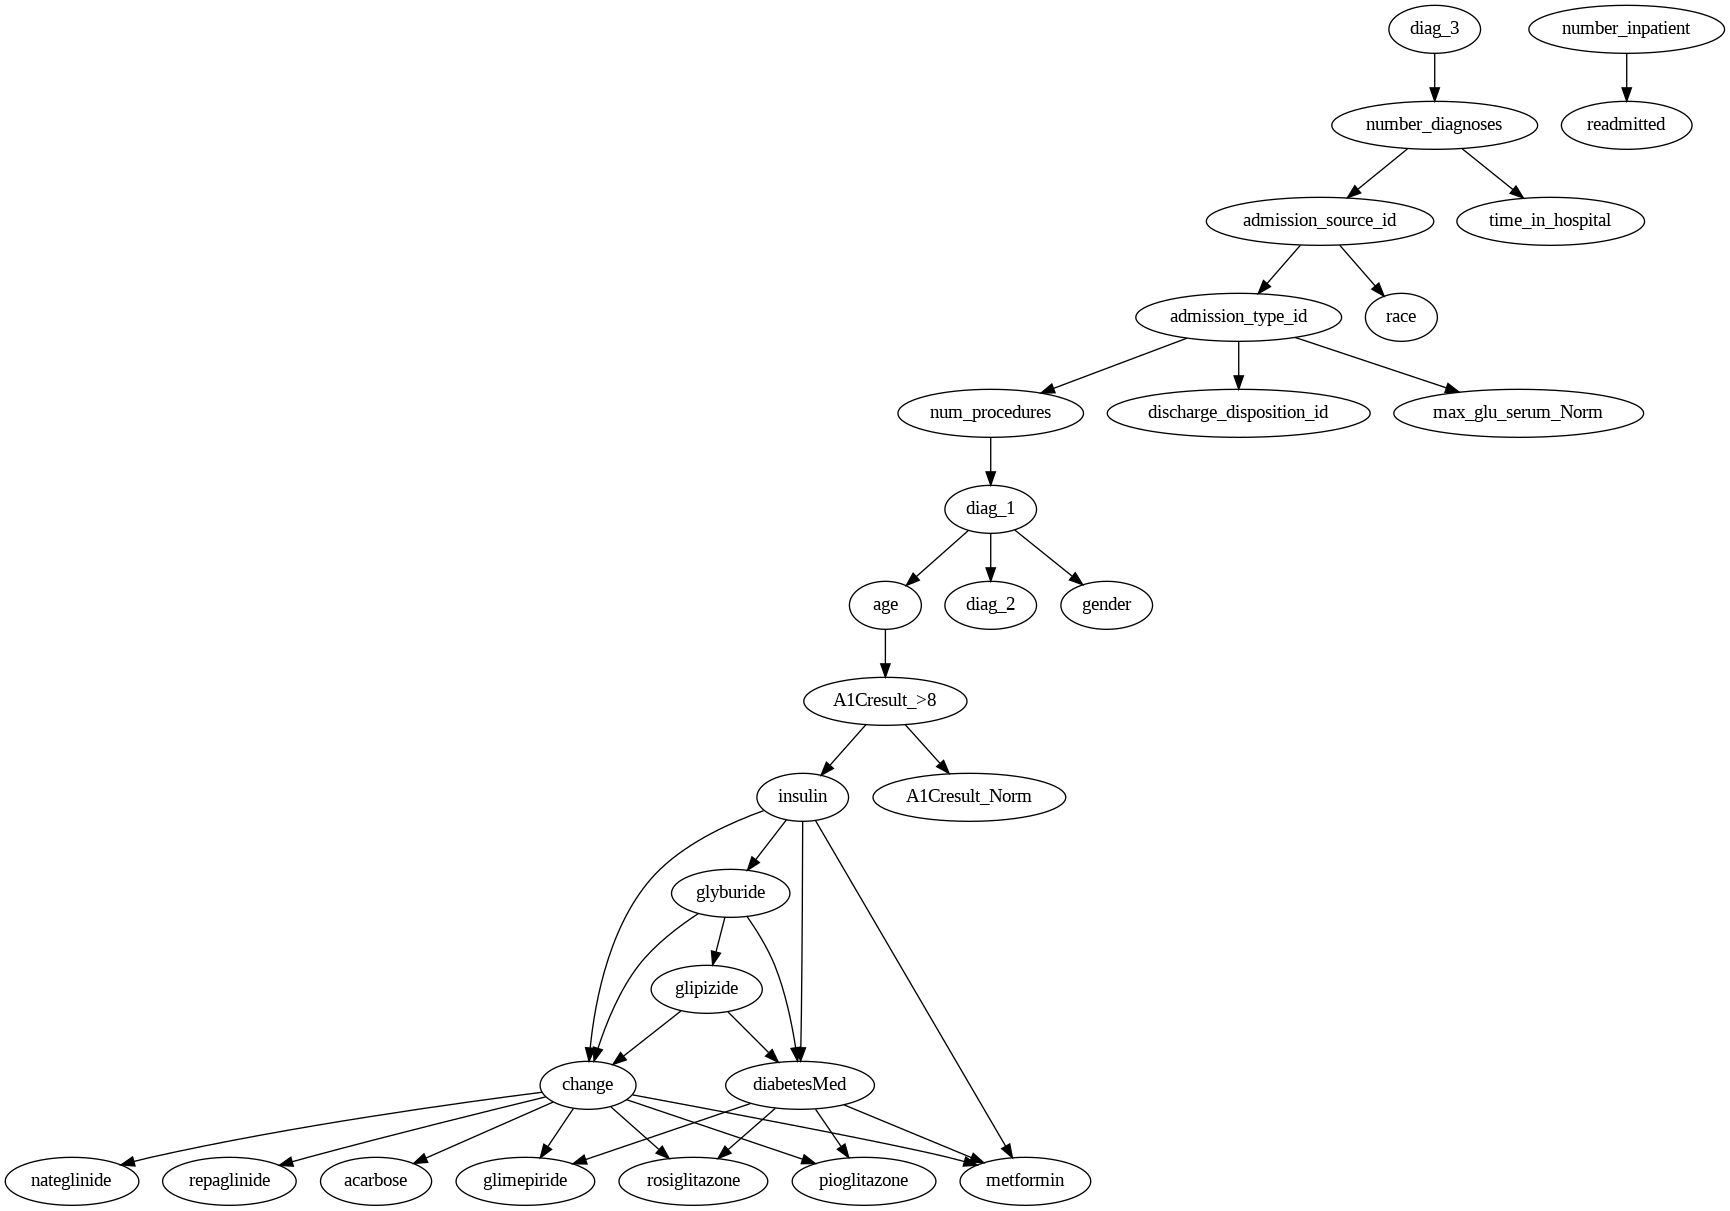

In [ ]:
import matplotlib.pyplot as plt
import pydot

# Create a Pydot graph object
graph = pydot.Dot(graph_type='digraph', bgcolor='white', rankdir='TB')

# Add nodes
for node in BN.nodes():
    graph.add_node(pydot.Node(node))

# Add edges
for edge in BN.edges():
    graph.add_edge(pydot.Edge(edge[0], edge[1]))

# Save the plot as a PNG file (optional)
plot_filename = 'bayesian_network.png'
graph.write_png(plot_filename)

# Display the plot (optional)
from IPython.display import Image
Image(filename='bayesian_network.png')

## Rulefit

In [ ]:
from sklearn.ensemble import RuleFit

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the RuleFit model
rulefit = RuleFit(max_rules=200, max_depth=3)
rulefit.fit(X_train, y_train)

# 4. Evaluate the model
y_pred = rulefit.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.4f}')

# Optionally, you can inspect the rules learned by RuleFit
print("Rules used by RuleFit:")
for rule in rulefit.get_rules():
    print(rule)

# Local Explanations

# Evaluation